In [21]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

def reverse_url(url):
    components = str(url).split('.')
    reversed_url = '.'.join(components[::-1])
    return reversed_url

def plot_pre_post_dists(exp_name, post_file, metric="pagerank_centrality", pre_file='output/ranks/exp-baseline.label_only.out'):
    domain_labels = pd.read_csv('../../data/attributes.csv')[['url', 'label']]
    cc_rank_cols = ["harmonic_rank", "harmonic_centrality", "pagerank_rank", "pagerank_centrality", "url", "a"]
    
    # Read pre and post rankings data
    pre_rankings = pd.read_csv(pre_file, sep='\t', names=cc_rank_cols)
    post_rankings = pd.read_csv(post_file, sep='\t', names=cc_rank_cols)
    pre_rankings['url'] = pre_rankings['url'].apply(reverse_url)
    post_rankings['url'] = post_rankings['url'].apply(reverse_url)


    # Filter columns
    pre_rankings = pre_rankings.iloc[:, :-1]  # Drop last column
    post_rankings = post_rankings.iloc[:, :-1]  # Drop last column

    # Merge with domain labels data
    pre_rankings_filtered = pre_rankings.merge(domain_labels, on='url', how='inner')
    post_rankings_filtered = post_rankings.merge(domain_labels, on='url', how='inner')

    beforepr = pre_rankings_filtered[['url', 'label', metric]].assign(Intervention=0)
    afterpr = post_rankings_filtered[['url', 'label', metric]].assign(Intervention=1)

    # Combine dataframes
    longpr = pd.concat([beforepr, afterpr], ignore_index=True)
    longpr['label'] = pd.Categorical(longpr['label'])

    # Group means/medians
    group_means = longpr.groupby(['Intervention', 'label'])[metric].mean()
    group_medians = longpr.groupby(['Intervention', 'label'])[metric].median()

    # Plot
    # plt.figure(figsize=(10, 6))
    # longpr.boxplot(column=metric, by=['Intervention', 'label'], grid=False, rot=45)
    # plt.title('Pre- and Post-Intervention Log Pagerank Scores\nAcross Reliability Labels')
    # plt.xlabel('Pre- and post-intervention reliability labels')
    # plt.ylabel('Log Pagerank')
    # plt.legend(['pre-Intervention', 'post-Intervention'], loc='upper left', bbox_to_anchor=(1, 1))
    # plt.tight_layout()
    # plt.show()

    longpr['Intervention_Group'] = longpr['Intervention'].apply(lambda x: 'pre-Intervention' if x == 0 else 'post-Intervention')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=metric, hue='Intervention_Group', data=longpr)#, showfliers=False)
    plt.yscale('log')  # Set y-axis scale to logarithmic
    plt.title(f'{exp_name}: \nIntervention Effect on Log Pagerank')
    plt.xlabel('Pre- and post-intervention reliability labels')
    plt.ylabel('Log Pagerank')
    plt.legend(title='Intervention', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_2486541/3106323123.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = longpr.groupby(['Intervention', 'label'])[metric].mean()
/tmp/ipykernel_2486541/3106323123.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = longpr.groupby(['Intervention', 'label'])[metric].median()


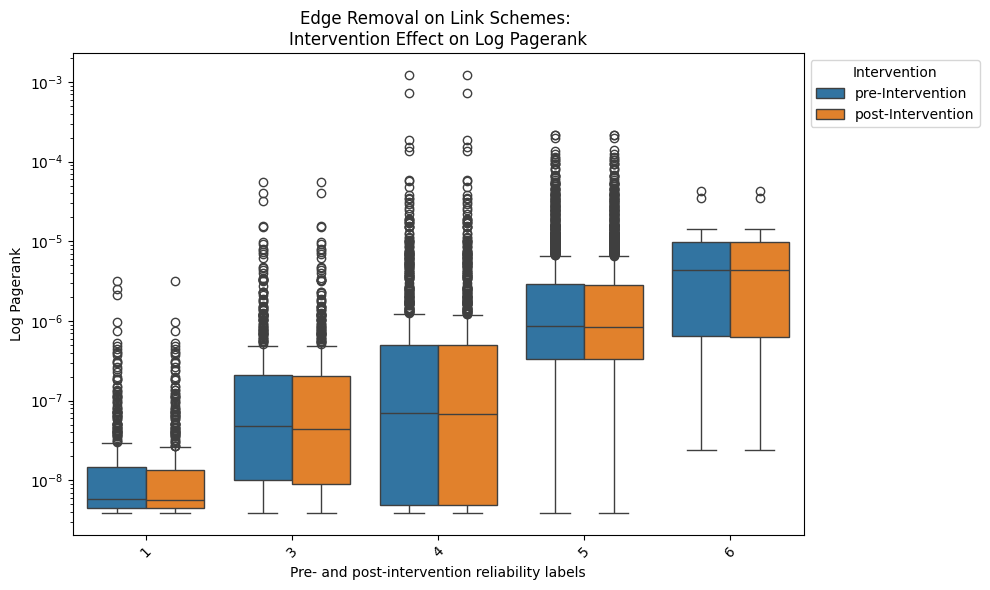

/tmp/ipykernel_2486541/3106323123.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = longpr.groupby(['Intervention', 'label'])[metric].mean()
/tmp/ipykernel_2486541/3106323123.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = longpr.groupby(['Intervention', 'label'])[metric].median()


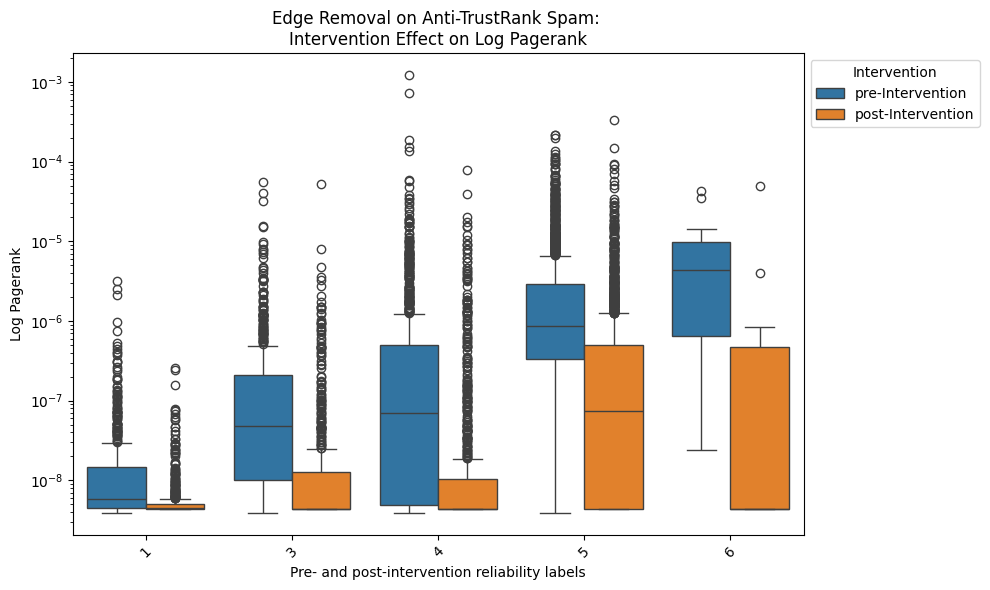

/tmp/ipykernel_2486541/3106323123.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = longpr.groupby(['Intervention', 'label'])[metric].mean()
/tmp/ipykernel_2486541/3106323123.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = longpr.groupby(['Intervention', 'label'])[metric].median()


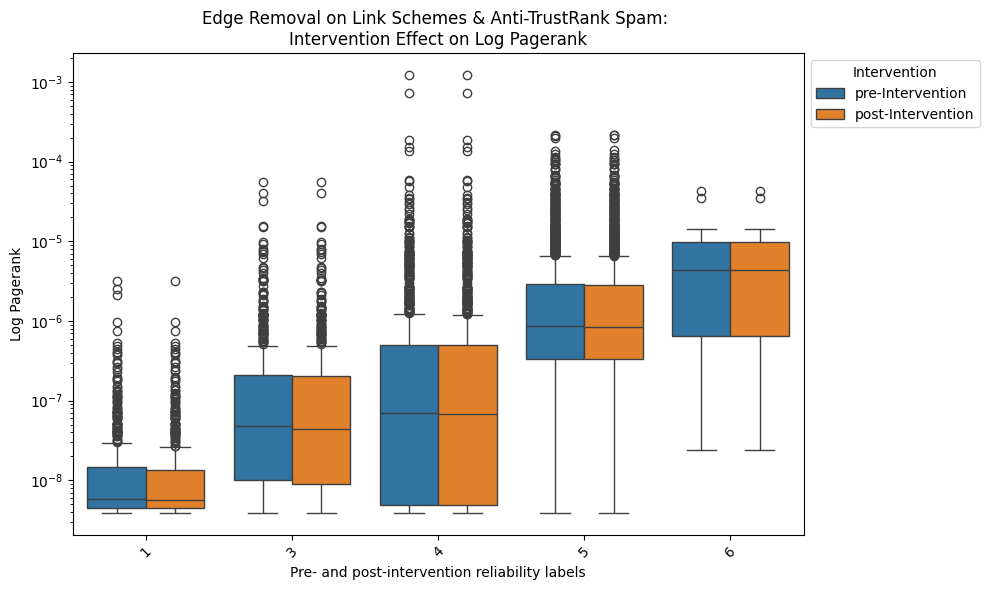

In [26]:
intervention_exps = [
    # ('PPR on Reliable News', 'output/ranks/exp-rel-ppr.label_only.out'),
    # ('Inv-PPR on Unreliable News', 'output/ranks/exp-unrel-ppr-down.label_only.out'),
    # ('Inv-PPR on Link Schemes', 'output/ranks/exp-ls-ppr-down.label_only.out'),
    # ('Inv-PPR on Anti-TrustRank Spam', 'output/ranks/exp-ls-str-ppr-down.label_only.out'),
    ('Edge Removal on Link Schemes', 'output/ls_filtered/ls_filtered-ranks.label_only.txt'),
    ('Edge Removal on Anti-TrustRank Spam', 'output/ls_atr_filtered/ls_atr_filtered-ranks.label_only.txt'),
    ('Edge Removal on Link Schemes & Anti-TrustRank Spam', 'output/ls_combined_filtered/ls_combined_filtered-ranks.label_only.txt'),
]    
    
# "harmonic_rank", "harmonic_centrality", "pagerank_rank", "pagerank_centrality",
for (exp_name, post_file) in intervention_exps:
    plot_pre_post_dists(exp_name, post_file, "pagerank_centrality")

In [11]:
# Statistical tests
# T-test
t_stat, p_value = ttest_ind(longpr[longpr['Intervention'] == 0][metric],
                             longpr[longpr['Intervention'] == 1][metric])

# ANOVA
model = ols('pagerank_centrality ~ label', data=beforepr).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
label,1.0,1.094386e-08,1.094386e-08,17.188699,0.000035
Residual,3903.0,2.484998e-06,6.366893e-10,NaN,NaN


In [12]:
from scipy.stats import mannwhitneyu, kruskal
import numpy as np

# Example data (replace with your actual data)
pre_intervention_data = pre_rankings_filtered[[metric]]
post_intervention_data = post_rankings_filtered[[metric]]
assert(all(post_rankings_filtered['url'] == pre_rankings_filtered['url']))
group_labels = pre_rankings_filtered['label']

# Perform Mann-Whitney U test for each group
for label in np.unique(group_labels):
    group_pre = pre_intervention_data[group_labels == label]
    group_post = post_intervention_data[group_labels == label]
    _, p_value = mannwhitneyu(group_pre, group_post)
    print(f"Mann-Whitney U test p-value for group {label}: {p_value}")

# Perform Kruskal-Wallis H test
_, p_value = kruskal(pre_intervention_data, post_intervention_data)
print(f"Kruskal-Wallis H test p-value: {p_value}")


Mann-Whitney U test p-value for group 1: [0.11962366]
Mann-Whitney U test p-value for group 3: [0.60153153]
Mann-Whitney U test p-value for group 4: [0.67326786]
Mann-Whitney U test p-value for group 5: [0.91176745]
Mann-Whitney U test p-value for group 6: [0.78798501]
Kruskal-Wallis H test p-value: [0.71651213]


In [10]:
str_discovered_urls = pd.read_csv('data/preference_vectors/domain_lists/link_scheme_str_domains.txt', names=['url'])
str_discovered_urls['url'] = str_discovered_urls['url'].apply(reverse_url)
str_urls_overlap = str_discovered_urls.merge(right=domain_labels[['url', 'label']], on='url', how='inner')
str_urls_overlap.groupby('label').count()

,url
label,
1,94
3,264
4,282
5,813
6,10


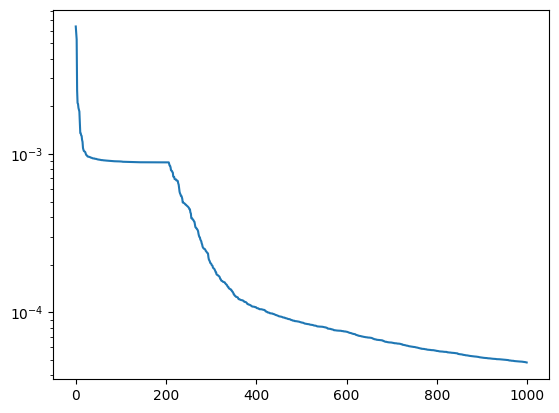

In [9]:
import matplotlib.pyplot as plt
str_discovered_ranks = pd.read_csv('output/exp-ls-str-discover-top.out.sorted', sep='\t', names=cc_rank_cols).head(1000)
plt.plot(str_discovered_ranks['pagerank_centrality'])
plt.yscale('log')

In [10]:
str_discovered_ranks.head(100)

,harmonic_rank,harmonic_centrality,pagerank_rank,pagerank_centrality,url,a
0,76468047,0.000000e+00,1,0.006386,com.blogspot,4923095
1,66504102,1.389359e-31,2,0.005737,com.wordpress,4611551
2,96375303,0.000000e+00,3,0.005291,com.webranksite,1
3,23485615,1.534193e-01,4,0.002518,com.kingranks,1
4,63902281,1.997964e-22,5,0.002098,com.articlement,1
...,...,...,...,...,...,...
95,66918829,5.370093e-33,96,0.000898,com.healingfoodreference,1
96,106774200,0.000000e+00,97,0.000897,net.callmestormy,1
97,186187361,-6.117392e+32,98,0.000897,com.scaredmonkeys,1
98,180068512,-1.002780e+11,99,0.000897,com.proseoarticles,1
